# Project #4: Can we predict whether a Hotel Booking will be cancelled?

In [1]:
import seaborn as sb #importing necessary packages for working with the data
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
pd.set_option("display.max_rows",100)

## EDA

### Loading Dataset

Dataset will be loaded into dataframe using pandas

In [2]:
data = pd.read_csv('hotel_bookings.csv') # import data from csv to python using pandas
data = data[(data['adr'] < 5400) & (data['adr'] >=0)   ] # removing singular outlier of 5400 adr and singular outlier of negative adr
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Index: 119388 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119388 non-null  object 
 1   is_canceled                     119388 non-null  int64  
 2   lead_time                       119388 non-null  int64  
 3   arrival_date_year               119388 non-null  int64  
 4   arrival_date_month              119388 non-null  object 
 5   arrival_date_week_number        119388 non-null  int64  
 6   arrival_date_day_of_month       119388 non-null  int64  
 7   stays_in_weekend_nights         119388 non-null  int64  
 8   stays_in_week_nights            119388 non-null  int64  
 9   adults                          119388 non-null  int64  
 10  children                        119384 non-null  float64
 11  babies                          119388 non-null  int64  
 12  meal                 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Bookings per Countries

In [3]:
countrycounts = data.value_counts('country') #Finding number of bookings for each country
others=0
countries = []
values = []
for i,j in enumerate(countrycounts.index): #Consolidating countries with a small number of bookings.
    if (countrycounts.values[i]<=1000):
        others +=countrycounts.values[i]
    else:
        countries.append(j)
        values.append(countrycounts.values[i])
values.append(others)
countries.append("Others")
print(sum(countrycounts.values))





118900


Others are countries with 1000 bookings or less


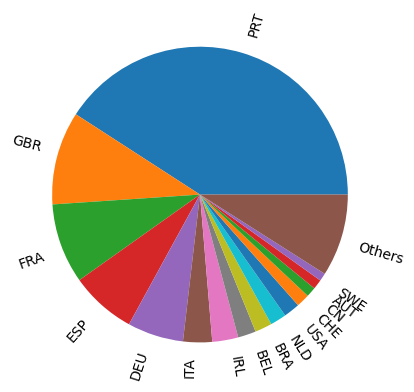

In [4]:
plt.pie(values,labels=countries,rotatelabels=True)
print("Others are countries with 1000 bookings or less")

others are countries with 1000 bookings or less


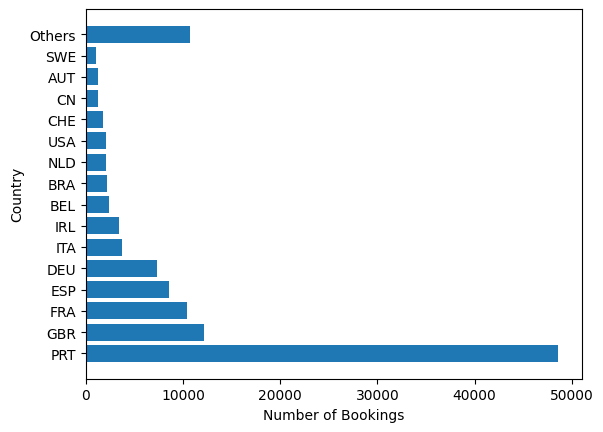

In [5]:
plt.barh(countries,values)
plt.xlabel('Number of Bookings')
plt.ylabel('Country')
print("others are countries with 1000 bookings or less")

Others are countries with 1000 bookings or less


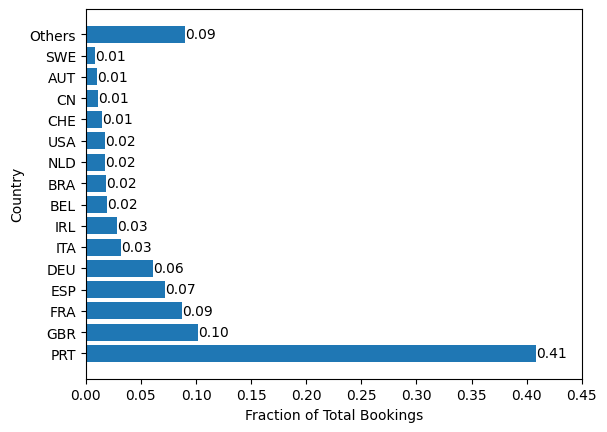

In [6]:
ctrbk, ctrbkax = plt.subplots()
barh = ctrbkax.barh(countries,values/sum(values))
plt.xlim((0,0.45))
plt.xlabel('Fraction of Total Bookings')
plt.ylabel('Country')
ctrbkax.bar_label(barh, fmt='%.2f')
print("Others are countries with 1000 bookings or less")

We see that portugal has the most bookings of any country, at 48590

### Pricing For Each Hotel

In [7]:
resorthotel=data[data['hotel']=="Resort Hotel"] #Seperating adr by hotel type
cityhotel=data[(data['hotel']=="City Hotel")] 
rhmin=math.floor(min(resorthotel['adr']))
rhmax=math.ceil(max(resorthotel['adr']))
chmin=math.floor(min(cityhotel['adr']))
chmax=math.ceil(max(cityhotel['adr']))

The mean is: 94.95545919768342
The median is: 75.0


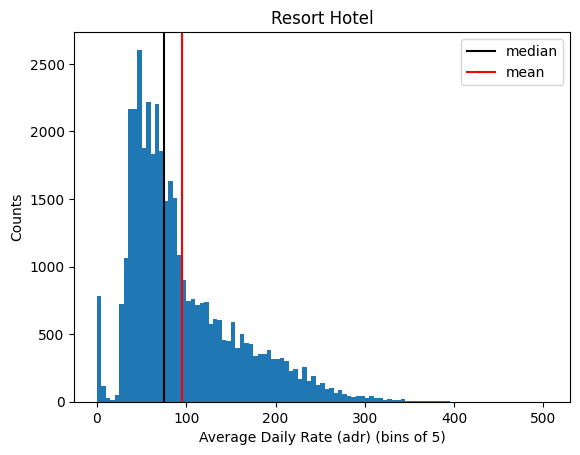

In [8]:
plt.hist(resorthotel['adr'],bins=[rhmin +5*i for  i in range(math.ceil((rhmax-rhmin + 1)/5))]) 
plt.axvline(resorthotel['adr'].median(),color='black',label="median") #plotting resort hotel adr distribution
plt.axvline(resorthotel['adr'].mean(),color='red',label="mean")
plt.legend()
plt.xlabel("Average Daily Rate (adr) (bins of 5)")
plt.ylabel("Counts")
plt.title("Resort Hotel")
print("The mean is: " + str(resorthotel['adr'].mean()))
print("The median is: " + str(resorthotel['adr'].median()))

removed outlier with 5400 adr
The mean is: 105.23772189237226
The median is: 99.9


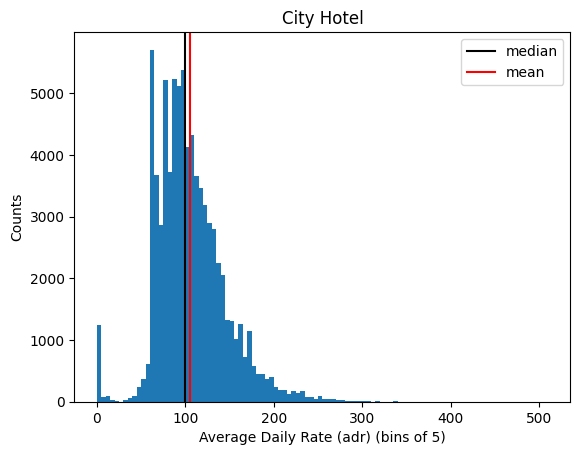

In [9]:
plt.hist(cityhotel['adr'],bins=[chmin +5*i for  i in range(math.ceil((chmax-chmin + 1)/5))])
plt.axvline(cityhotel['adr'].median(),color='black',label="median")
plt.axvline(cityhotel['adr'].mean(),color='red',label="mean") #plotting city hotel adr distribution
plt.legend()
plt.xlabel("Average Daily Rate (adr) (bins of 5)")
plt.ylabel("Counts")
plt.title("City Hotel")
print("removed outlier with 5400 adr" )
print("The mean is: " + str(cityhotel['adr'].mean()))
print("The median is: " + str(cityhotel['adr'].median()))

We see that the median Average daily rate of Resort Hotel is at 75.0 which is lower than City Hotel at 99.9. The mean of Resort Hotel is also lower, at 94.95 compared to City Hotel at 105.24

### Monthly Rates

In [10]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthlydatarh =[] #[(count,meanadr,medianadr,cancelations)]
monthlydatach = []
for hotel in [(monthlydatarh,resorthotel), (monthlydatach,cityhotel)]:
    for i in months: #evaluating number of bookings, mean cost, median cost and cancelations for each month for resort,city hotel
        datamonth = hotel[1][hotel[1]['arrival_date_month'] == i]
        hotel[0].append([datamonth['arrival_date_month'].count(),datamonth['adr'].mean(),datamonth['adr'].median(),datamonth[datamonth['is_canceled']==1]['is_canceled'].count()])

monthlydatarh = np.array(monthlydatarh)
monthlydatach = np.array(monthlydatach)

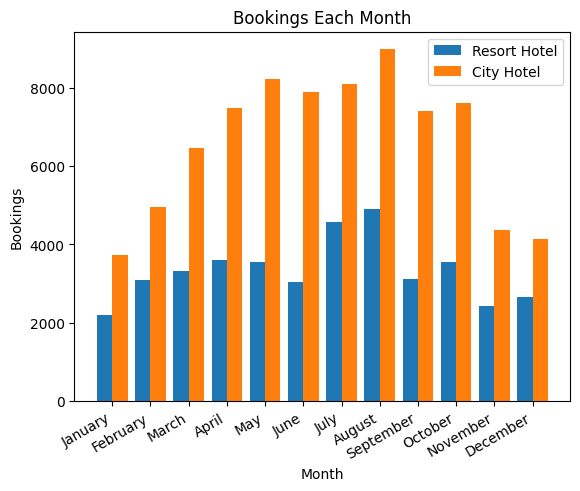

In [11]:
bpm, bpmax = plt.subplots() # Bookings per month for both hotels
w= 0.4
cont=bpmax.bar(np.arange(len(months))-w/2,monthlydatarh[:,0],w,label="Resort Hotel")
cont2 = bpmax.bar(np.arange(len(months))+w/2,monthlydatach[:,0],w,label="City Hotel")
plt.xlabel('Month')
plt.xticks(rotation=30,ha='right')
plt.xticks(np.arange(len(months)),months)
plt.ylabel('Bookings')
plt.title('Bookings Each Month')
plt.legend()
print()

We see that August is the busiest month for both hotels

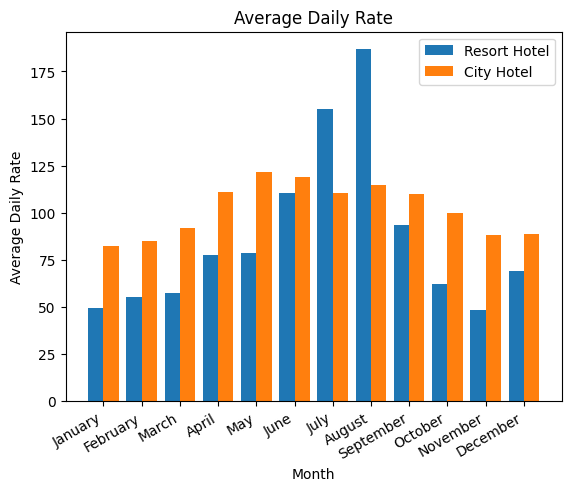

In [12]:
cpm, cpmax = plt.subplots() # mean adr per month for both hotels
w= 0.4
cont=cpmax.bar(np.arange(len(months))-w/2,monthlydatarh[:,1],w,label="Resort Hotel")
cont2 = cpmax.bar(np.arange(len(months))+w/2,monthlydatach[:,1],w,label="City Hotel")
plt.xlabel('Month')
plt.xticks(rotation=30,ha='right')
plt.xticks(np.arange(len(months)),months)
plt.ylabel('Average Daily Rate')
plt.title('Average Daily Rate')
plt.legend()
print()

We see that the most expensive nights are in August for Resort Hotel, but for City Hotel, they are in May

### Cancelation rate for each month

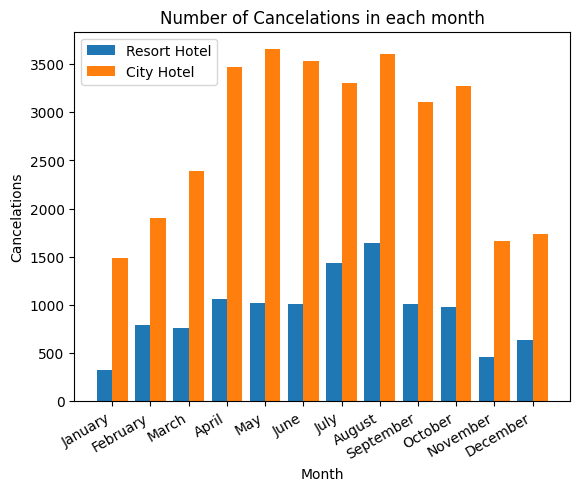

In [13]:
crpm, crpmax = plt.subplots() # plotting number of cancelations per month
w= 0.4
cont=crpmax.bar(np.arange(len(months))-w/2,monthlydatarh[:,3],w,label="Resort Hotel")
cont2 = crpmax.bar(np.arange(len(months))+w/2,monthlydatach[:,3],w,label="City Hotel")
plt.xlabel('Month')
plt.xticks(rotation=30,ha='right')
plt.xticks(np.arange(len(months)),months)
plt.ylabel('Cancelations')
plt.title('Number of Cancelations in each month')
plt.legend(loc='upper left')
print()

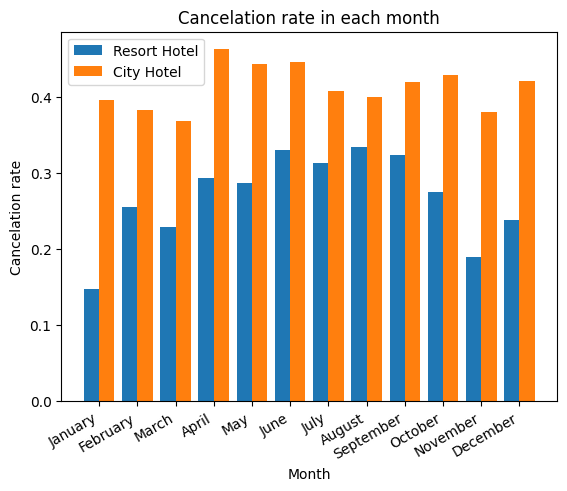

In [14]:
crpm, crpmax = plt.subplots() # plotting cancelation rate per month
w= 0.4
cont=crpmax.bar(np.arange(len(months))-w/2,[i/j for i,j in zip(monthlydatarh[:,3],monthlydatarh[:,0])],w,label="Resort Hotel")
cont2 = crpmax.bar(np.arange(len(months))+w/2,[i/j for i,j in zip(monthlydatach[:,3],monthlydatach[:,0])],w,label="City Hotel")
plt.xlabel('Month')
plt.xticks(rotation=30,ha='right')
plt.xticks(np.arange(len(months)),months)
plt.ylabel('Cancelation rate')
plt.title('Cancelation rate in each month')
plt.legend(loc='upper left')
print()

We see that Resort Hotel has the highest number of cancelations and highest cancelation rate in august.
City Hotel on the other hand has its highest number of cancelations in may while its highest cancelation rate is in april.

### Bookings vs market segment

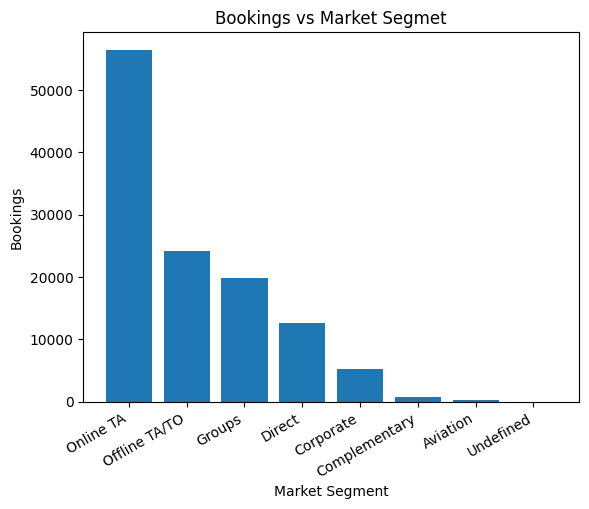

In [15]:
markseg = data.value_counts('market_segment') # Number of bookings per market segment
plt.bar(markseg.index,markseg.values)
plt.xticks(rotation=30,ha='right')
plt.title("Bookings vs Market Segmet")
plt.xlabel("Market Segment")
plt.ylabel("Bookings")
print()

### Bookings and Room Type

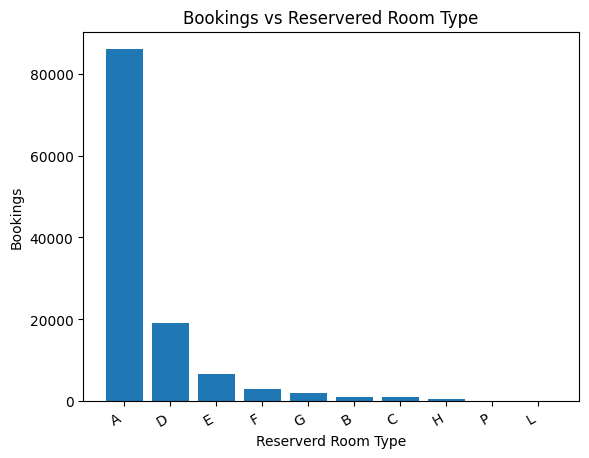

In [16]:
resroom= data.value_counts('reserved_room_type') #Number of bookings for each room type, both hotels combined
plt.bar(resroom.index,resroom.values)
plt.xticks(rotation=30,ha='right')
plt.title("Bookings vs Reservered Room Type")
plt.xlabel("Reserverd Room Type")
plt.ylabel("Bookings")
print()

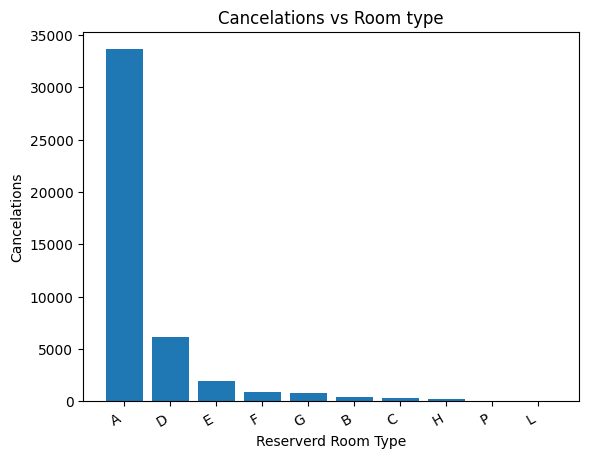

In [17]:
cancelledroomtypes = data[data['is_canceled'] ==1].value_counts('reserved_room_type')
plt.bar(cancelledroomtypes.index,cancelledroomtypes.values)
plt.xticks(rotation=30,ha='right')
plt.title("Cancelations vs Room type")
plt.xlabel("Reserverd Room Type")
plt.ylabel("Cancelations")
print()

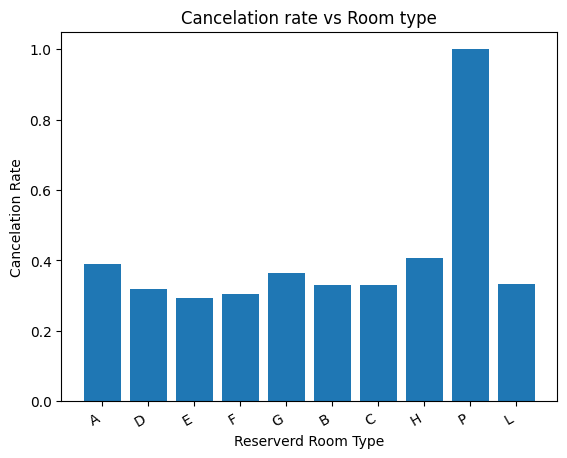

In [18]:
plt.bar( cancelledroomtypes.index,[i/float(j)for i,j in zip(cancelledroomtypes.values,resroom.values)])
plt.xticks(rotation=30,ha='right')
plt.title("Cancelation rate vs Room type")
plt.xlabel("Reserverd Room Type")
plt.ylabel("Cancelation Rate")
print()

We see that most bookings are of room type A, and the largest cancelation rate is for room type P

### Cancelation rate for each hotel

In [19]:
rhcrate = resorthotel[resorthotel['is_canceled']==1]['is_canceled'].count()/float(resorthotel['is_canceled'].count())
chcrate = cityhotel[cityhotel['is_canceled']==1]['is_canceled'].count()/float(cityhotel['is_canceled'].count())
#cancelation rates for each hotel
print('Cancelation rate for Resort Hotel is ' + str(rhcrate))
print('Cancelation rate for City Hotel is ' + str(chcrate))

Cancelation rate for Resort Hotel is 0.27764048029156996
Cancelation rate for City Hotel is 0.41726228743586835


## Modeling and Question Answering

### Data preperation for training

In [20]:
from sklearn import model_selection # importing processing libraries
from sklearn.preprocessing import LabelEncoder
import sklearn
import warnings
numericlabdata=data.copy()
sklearn.set_config(enable_metadata_routing=True)

In [21]:
re = LabelEncoder()
re.fit(numericlabdata['reserved_room_type']) #converting certain string labels to integer
nldm=[]
for j in numericlabdata['arrival_date_month']:
    for i,k in enumerate(months):
        if(k ==j):
            nldm.append(i)
numericlabdata['arrival_date_month'] = nldm
numericlabdata['reserved_room_type'] = re.transform(numericlabdata['reserved_room_type'])
ce = LabelEncoder()
ce.fit(numericlabdata['country'])
numericlabdata['country'] = ce.transform(numericlabdata['country'])

In [22]:
train, test = model_selection.train_test_split(numericlabdata, train_size=0.8) #splitting into training and test
ytrain = train['is_canceled']
#selected certain features for x training
xtrain = train[['lead_time','country','arrival_date_month','stays_in_week_nights','stays_in_weekend_nights','adr']]
ytest= test['is_canceled']
xtest = test[['lead_time','country','arrival_date_month','stays_in_week_nights','stays_in_weekend_nights','adr']]

In [23]:
def precision(ypred,ytest):
    tp=sum([((j ==1) and (i==j))for i,j in zip(ypred,ytest)]) 
    fp=sum([((j ==0) and (i==1))for i,j in zip(ypred,ytest)])
    return float(tp)/(tp+fp)

In [24]:
def recall(ypred,ytest):
    tp=sum([((j ==1) and (i==j))for i,j in zip(ypred,ytest)])
    fn=sum([((j ==1) and (i==0))for i,j in zip(ypred,ytest)])
    return float(tp)/(tp+fn)

In [25]:
def fscore(precision,recall):
    return 2*precision*recall/(precision+recall)
    

### Algorithm 1 Logistic Regression

Algorithm 1 will be logistic regression with log cost function
$\sum_{i=1}^n-y_i\log(p(X_i))-(1-y_i)\log(1-p(X_i))$
where p is the model predictor for y and X is the input features. Also $p(x) = \frac{1}{1+e^{-h(x,w)}}$ where $h(x,w) = w_0+\sum_{i=1}^{m-1}w_i*x_i$ where m-1 is the number of features, and $w_i$ is the weight for each feature.


#### Single Model

In [26]:
def logloss(model,xtest, ytest):
    ypredp = model.predict_proba(xtest)
    return sum([-i*np.log(j) - (1-i)*np.log(1-j) for i,j in zip(ytest,ypredp[:,1])])/len(ypredp)

In [27]:
from sklearn import linear_model
logmodel=linear_model.LogisticRegression(solver='sag',penalty=None,max_iter=1000).fit(xtrain,ytrain)
ypredp=logmodel.predict_proba(xtest)
print("log cost function: " + str(logloss(logmodel,xtrain,ytrain)))

log cost function: 0.5737501610089337


In [28]:
ypred=logmodel.predict(xtest)
print("Accuaracy: " + str (logmodel.score(xtest,ytest)))

Accuaracy: 0.7044141050339224


In [29]:
logrec = recall(ypred,ytest)
logprec = precision(ypred,ytest)
logfscore = fscore(logprec,logrec)
print("Recall: " + str(logrec))
print("Precision: " + str(logprec))
print(f"Fscore: {logfscore}")

Recall: 0.42506474496115304
Precision: 0.6591583726209185
Fscore: 0.5168400876232202


#### Cross Validation Models

In [30]:
crossval=model_selection.cross_validate(linear_model.LogisticRegression(penalty=None,max_iter=300),X=xtrain,y=ytrain,cv=5,return_estimator=True)
#cross validation with 5 splits for logistic regression

In [31]:
predict = []
for i in crossval['estimator']: #Taking the average of the predictions of all models from cross validation
    predict.append(np.array(i.predict(xtest)))
predofallmodels=sum(predict)
predofallmodels = [round(i/5) for i in predofallmodels]
print("The following accuracy is determined using the vote of all models for each datapoint")
print(f"Accuracy: {1-sum(np.abs(np.array(predofallmodels)-np.array(ytest)))/len(ytest)}") #Finding the accuracy of the models prediction

The following accuracy is determined using the vote of all models for each datapoint
Accuracy: 0.7038277912723009


In [32]:
logrecam = recall(predofallmodels,ytest)
logprecam = precision(predofallmodels,ytest)
logfscoream = fscore(logprecam,logrecam)
print("Recall: " + str(logrecam))
print("Precision: " + str(logprecam))
print(f"Fscore: {logfscoream}")

Recall: 0.4236009458394325
Precision: 0.658267716535433
Fscore: 0.5154836941627843


The model predictions are correct around 71% of the time. The reason why this could be so low may be due to a lack of features for the model to make an accurate prediction, or the model not having enough parameters to fit the actual underlying function. The cross validation prediction accuracy is of 0.7048, this is not a significant improvement from that of 0.7044. The Recall, Precision, and Fscore are also not significantly different

### Algorithm 2 K-Nearest Neighbor
Algorithm 2 will be 5-nearest-neighbour classification. It will use the L2 metric to classify points. The L2 metric is defined as $\sqrt{\sum^D_{i=1} |x_i-y_i|^2}$ where $x_i,y_i$ are in the same dimension and D is the number of dimensions. Takes the 5 closest point to the new data point and uses them to vote on the classification of the new data point.

#### Single Model

In [33]:
from sklearn import neighbors
# Using 5 neighbors
knnmodel = neighbors.KNeighborsClassifier(n_neighbors=5).fit(xtrain,ytrain)

In [34]:
print(f"Accuracy of model: {knnmodel.score(xtest,ytest)}")
knnpred = knnmodel.predict(xtest)

Accuracy of model: 0.7901415528938772


In [35]:
knnrec = recall(knnpred,ytest)
knnprec = precision(knnpred,ytest)
knnfscore = fscore(knnprec,knnrec)
print("Recall: " + str(knnrec))
print("Precision: " + str(knnprec))
print(f"Fscore: {knnfscore}")

Recall: 0.6547686071388357
Precision: 0.7493556701030928
Fscore: 0.6988762694549606


#### Cross Validation Models

In [36]:
knncrossval=model_selection.cross_validate( neighbors.KNeighborsClassifier(n_neighbors=5),X=xtrain,y=ytrain,cv=5,return_estimator=True)
#cross validation with 5 splits for 5-nearest neighbors

In [37]:
knnpredict = []
for i in knncrossval['estimator']: #Taking the average of the predictions of all models from cross validation
    knnpredict.append(np.array(i.predict(xtest)))
knnpredofallmodels=sum(knnpredict)
knnpredofallmodels = [round(i/5) for i in knnpredofallmodels]
print("The following accuracy is determined using the vote of all models for each datapoint")
print(f"Accuracy: {1-sum(np.abs(np.array(knnpredofallmodels)-np.array(ytest)))/len(ytest)}") #Finding the accuracy of the models prediction

The following accuracy is determined using the vote of all models for each datapoint
Accuracy: 0.7903509506658849


In [38]:
knnrecam = recall(knnpredofallmodels,ytest)
knnprecam = precision(knnpredofallmodels,ytest)
knnfscoream = fscore(knnprecam,knnrecam)
print("Recall: " + str(knnrecam))
print("Precision: " + str(knnprecam))
print(f"Fscore: {knnfscoream}")

Recall: 0.6488008107195136
Precision: 0.7533010851091646
Fscore: 0.697156684815487


The accuracy of the k nearest neighbors model is at around 78.6%. This is better than the logistic regression model, but still not great. This could be due to a lack of correlation between similar points. Once again there is not much of a difference between cross validation and no cross validation. We see that for both cross validation and no cross validataion, that the recall and precision is much better than that of logistic regression.

### Algorithm 3 Linear Regression
Algorithm 3 will be using Linear regression. Output will be rounded to 0 or 1. The loss function is mean square loss and the optimization algorithm is stochastic gradient descent

#### Single Model

In [39]:
from sklearn.linear_model import LinearRegression
# creating linear regression model
linmodel = LinearRegression().fit(xtrain,ytrain)


In [40]:
def linprediction(linmodel,xtest):
    linpred=linmodel.predict(xtest)
    for i,j in enumerate(linpred):
        if (np.abs(j-0) <= np.abs(j-1)):
            linpred[i] = 0
        else:
            linpred[i] = 1
    return linpred


In [41]:
linpred = linprediction(linmodel,xtest)
print(f"MSE: {linmodel.score(xtest,ytest)}")
print(f"Accuracy of model: {1 - sum(np.abs(np.array(linpred)-np.array(ytest)))/len(ytest)}")

MSE: 0.15654929352907587
Accuracy of model: 0.7014825362258146


In [42]:
linrec = recall(linpred,ytest)
linprec = precision(linpred,ytest)
linfscore = fscore(linprec,logrec)
print("Recall: " + str(linrec))
print("Precision: " + str(linprec))
print(f"Fscore: {linfscore}")

Recall: 0.40716135570318657
Precision: 0.659974447891951
Fscore: 0.5170907598948811


#### Cross-Validation

In [43]:
crossval=model_selection.cross_validate(linear_model.LinearRegression(),X=xtrain,y=ytrain,cv=5,return_estimator=True)
#cross validation with 5 splits for linear regression

In [44]:
linpredict = []
for i in crossval['estimator']: #Taking the average of the predictions of all models from cross validation
    linpredict.append(np.array(linprediction(i,xtest)))
linpredofallmodels=sum(linpredict)
linpredofallmodels = [round(i/5) for i in linpredofallmodels]
print("The following accuracy is determined using the vote of all models for each datapoint")
print(f"Accuracy: {1-sum(np.abs(np.array(linpredofallmodels)-np.array(ytest)))/len(ytest)}") #Finding the accuracy of the models prediction

The following accuracy is determined using the vote of all models for each datapoint
Accuracy: 0.7016500544434208


In [45]:
linrecam = recall(linpredofallmodels,ytest)
linprecam = precision(linpredofallmodels,ytest)
linfscoream = fscore(linprecam,linrecam)
print("Recall: " + str(linrecam))
print("Precision: " + str(linprecam))
print(f"Fscore: {linfscoream}")

Recall: 0.4078369552978268
Precision: 0.6601057043921997
Fscore: 0.5041759465478841


We see that the linear regression model is very similar to the logistic regression model. The lack of predictive power in the linear regression model can be attributed to a lack of linearity in the data, and also the discreteness of the features. It is also because the linear regression model is not suited for classification tasks. We once again see no significant difference between the one model and cross validation approach.